##Jupyter Notebooks for the book: 
##Semiconductor Integrated Optics for Switching Light 2nd Edition
#
#Notebook for Chapter 4:

## Started July 2020

Prof. Charlie Ironside,
Department of Physics and Astronomy,
Curtin University,
Bentley Campus,
Western Australia 6102.

* email: Charlie.Ironside@curtin.edu.au

* web page address:http://oasisapps.curtin.edu.au/staff/profile/view/Charlie.Ironside

#Nonlinear directional Coupler

 J. S. Aitchison, A. H. Kean, C. N. Ironside, A. Villeneuve, and G. I. Stegeman, "Ultrafast All-Optical Switching in Al0.18ga0.82as Directional Coupler in 1.55 Mu-M Spectral Region," Electronics Letters, vol. 27, pp. 1709-1710, Sep 12 1991  http://dx.doi.org/10.1049/el:19911064

Jacobi Elliptic functions in python http://mpmath.org/doc/current/functions/elliptic.html

Trig functions http://mpmath.org/doc/current/functions/trigonometric.html

elliptic function of the third kind: https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.elliptic_integrals.elliptic_pi

The figure below show the layout of a nonlinear directional coupler 

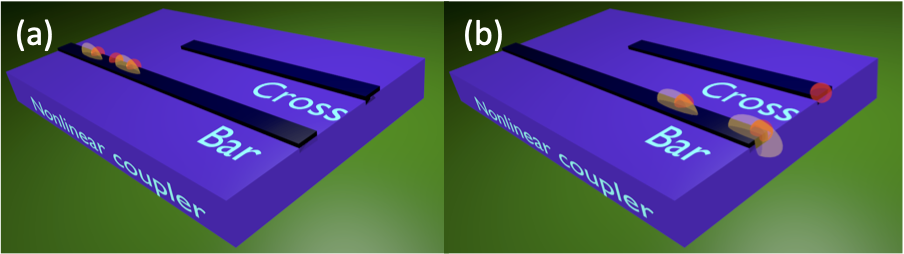

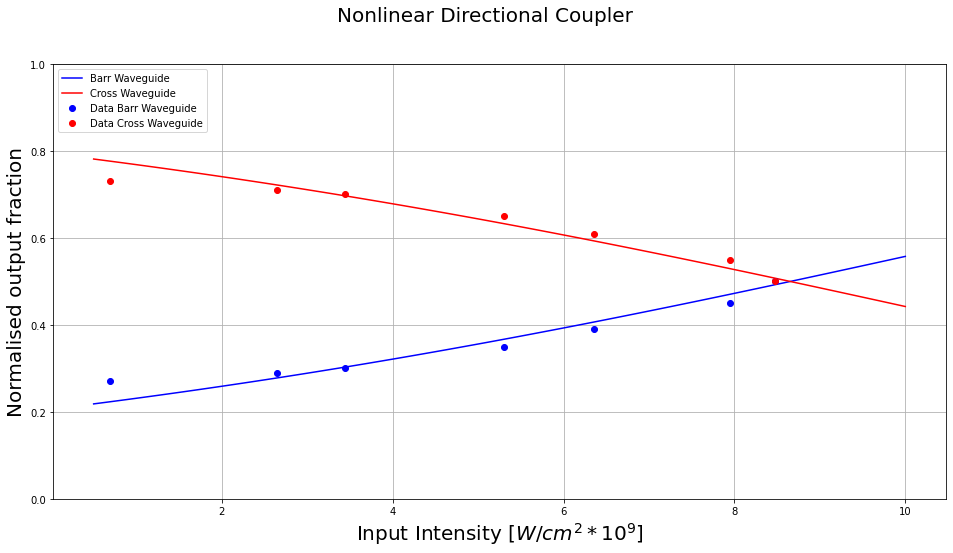

In [ ]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
"""The code plots the response function of the nonlinear directional coupler in AlGaAs -the the paper J. S. Aitchison et al and compares it with the data"""
pi=3.14159
cn=ellipfun('cn')
cnnumpy=np.frompyfunc(cn,2,1)#converts from mpmath function to numpy array function
points=100 #number of points to plot
l_z=6.25E-3 #input transfer length
l_c=l_z/0.7 #coupling length
wav_len=1.6E-6 #wavelength in meters
n_2=1.6E-14 #nonlinear refractive index cm2W-1
i_start=5.0E8
i_finish=10.0E9
i_in=np.linspace(i_start,i_finish,points) #input intensity
i_c=wav_len/l_c/n_2
m=i_in/i_c
i_barr=(1+cnnumpy(pi*l_z/l_c,m))/2
for i in range(points):#THERE'S A BUG in mpmath it sometimes returns a small imaginary part from ellipfun
    i_barr[i]=re(i_barr[i]) #this strips out the imaginary part
i_barrR=np.array(i_barr,dtype=float)
i_cross=1-i_barrR
data_barr=[0.27,0.29,0.30,0.35,0.39,0.45,0.5]#Fraction of output in barr guide- data from experiment
data_cross=[1-0.27,1-0.29,1-0.30,1-0.35,1-0.39,1-0.45,1-0.5]#Fraction of output in cross guide- data from experiment
s_f=0.53
data_in=[s_f*1.3,s_f*5,s_f*6.5,s_f*10,s_f*12,s_f*15,s_f*16]
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.suptitle('Nonlinear Directional Coupler',fontsize=20)
plt.ylabel('Normalised output fraction',fontsize=20)
plt.xlabel('Input Intensity $[W/cm^2 * 10^9] $',fontsize=20)
plt.plot(i_in*1E-9,i_barrR,'b-',label="Barr Waveguide")
plt.plot(i_in*1E-9,i_cross,'r-',label="Cross Waveguide")
plt.plot(data_in,data_barr,'bo',label="Data Barr Waveguide")
plt.plot(data_in,data_cross,'ro',label="Data Cross Waveguide")
plt.ylim((0,1))
plt.legend(loc=2)
plt.grid()
plt.show()


# Nonlinear Asymmetric Mach-Zehender interferometer

K. Alhemyari, J. S. Aitchison, C. N. Ironside, G. T. Kennedy, R. S. Grant, and W. Sibbett, "Ultrafast All-Optical Switching in GaAlAs Integrated Interferometer in 1.55micron Spectral Region," Electronics Letters, vol. 28, pp. 1090-1092, Jun 4 1992.http://dx.doi.org/10.1049/el:19920689

The figure below shows the layout of an integrated nonlinear asymmetric Mach-Zehnder interferometer

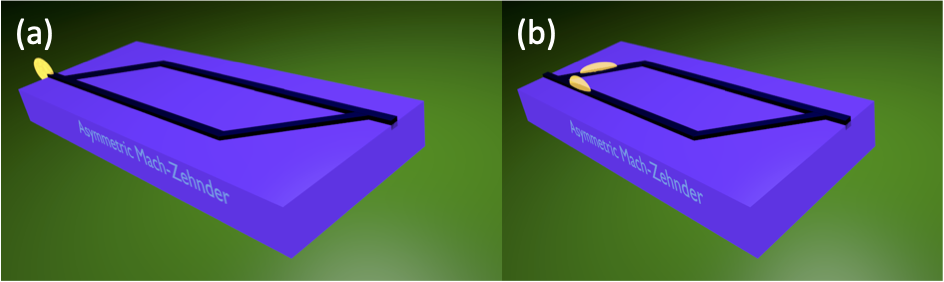

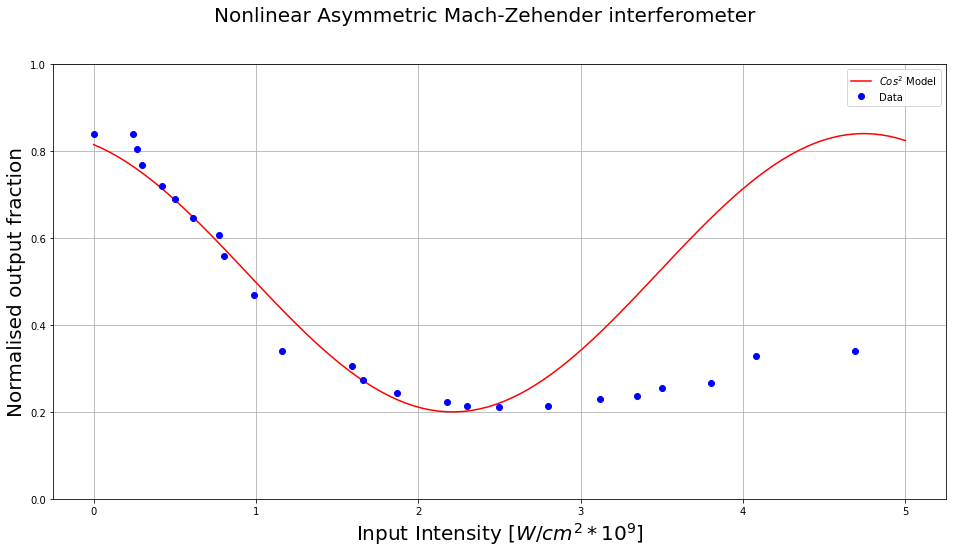

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
"""The code plots the response function of the Nonlinear aysmmetic Mach-Zehender Interferometer in AlGaAs - see the the paper K. Alhemyari et al. and compares it with the data"""
#input data with scale factor and offset
offd=-0.36
scale=1.5
datax=[4.69,4.08,3.8,3.5,3.345,3.12,2.8,2.5,2.3,2.176,1.871,1.66,1.59,1.16,0.99,0.8,0.77,0.61,0.5,0.42,0.30,0.27,0.24,0]#Data from K. Alhemyari et al -intensity W/cm2*E9
datay=[offd+scale*0.467,offd+scale*0.459,offd+scale*0.418,offd+scale*0.41,offd+scale*0.397,offd+scale*0.393,offd+scale*0.383,offd+scale*0.381,offd+scale*0.383,offd+scale*0.389,offd+scale*0.402,offd+scale*0.422,offd+scale*0.443,offd+scale*0.467,offd+scale*0.553,offd+scale*0.612,offd+scale*0.644,offd+scale*0.671,offd+scale*0.7,offd+scale*0.72,offd+scale*0.752,offd+scale*0.777,offd+scale*0.8,offd+scale*0.8]#Data from K. Alhemyari et al
#the next bit the cos squared model of the interferemeter
i_start=5E9 #intensity start value 
i_finish=0#intensity finish value 
points=100 #number of points to plot - for the model
i_in=np.linspace(i_start,i_finish,points) #input intensity
L=0.005 #length of interferometer in m
offset= 0.2 #Offset value for interfermeter
offset_phase=0#offset phase
delta=0.2 # splitting ratio
Lambda=1.52E-6 #*wavelength in m
n2=5E-14#nonlinear refractive index cm2/W
pi=3.14159
delta_theta=(2*pi*n2*i_in*L*(1-2*delta))/Lambda# nonlinear phase change
transmission=4*delta*(1-delta)*(np.cos(delta_theta+offset)**2)+offset #transmission of Nonlinear Asymmetric Mach-Zehender interferometer
#now plot data and model
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.suptitle('Nonlinear Asymmetric Mach-Zehender interferometer',fontsize=20)
plt.ylabel('Normalised output fraction',fontsize=20)
plt.xlabel('Input Intensity $[W/cm^2 * 10^9] $',fontsize=20)
plt.plot(i_in*1E-9,transmission,'r-',label="$Cos^2 $ Model")
plt.plot(datax,datay,'bo',label="Data")
plt.ylim((0,1))
plt.legend(loc=0)
plt.grid()
plt.show()
